In [1]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

Samples

Data Loading and Compiling

In [9]:
all_dirs = glob.glob("*/")
keywords = ["Inflorescence", "Fresh", "Dried",]
sample_dirs = [path for path in all_dirs if any(k in path for k in keywords)]
sample_names = ['bud_inflo', 'dried_flowers', 'fresh_inflo', 'picked_flowers']

In [11]:
sample_output_dir = "compiled_spectra_samples"
os.makedirs(sample_output_dir, exist_ok=True)

for i, (sample_path, sample_name) in enumerate(zip(sample_dirs, sample_names)):
    sample_df = pd.DataFrame()

    spectra_paths = glob.glob(f"{sample_path}/*.csv")
    spectra_dfs = [pd.read_csv(spec_path, names=['wavenumber', 'absorbance'], skiprows=2) for spec_path in spectra_paths]
    absorbance_dfs = [df['absorbance'] for df in spectra_dfs]
    sample_df = pd.concat(absorbance_dfs, axis=1)
    sample_df.columns = [f"{sample_name}_{i}" for i in range(1,len(sample_df.columns)+1)]

    sample_df.to_csv(f"{sample_output_dir}/{sample_name}.csv", index=False)

    if i == 0:
        wavenumber = spectra_dfs[0]['wavenumber']
        wavenumber.to_csv("wavenumber.csv", index=False)

Visualization

In [18]:
compiled_sample_dirs = glob.glob(f"{sample_output_dir}/*")
compiled_sample_dfs = [pd.read_csv(compiled_sample_path) for compiled_sample_path in compiled_sample_dirs]

for df in compiled_sample_dfs:
    df['average'] = df.mean(axis=1)

bud_inflo, dried_flowers, fresh_inflo, picked_flowers = compiled_sample_dfs

pooled_sample_dfs = [fresh_inflo, bud_inflo, picked_flowers, dried_flowers]
compiled_sample_names = ["Fresh Inflorescence", "Bud Inflorescence", "Picked Flowers", "Dried Flowers"]
sample_colors = ["yellow", "green", "red", "blue"]

wavenumber = pd.read_csv('wavenumber.csv')

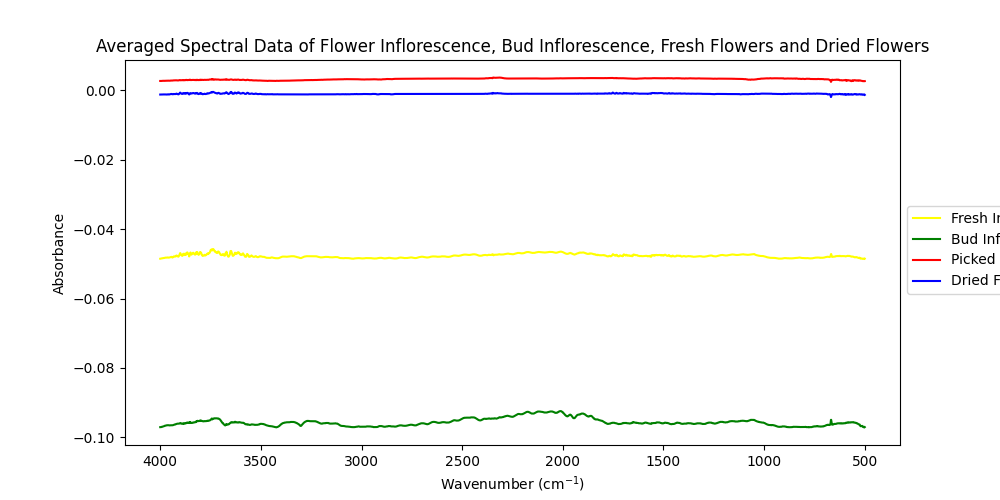

In [203]:
plt.close('all')

gas_fig, gas_axis = plt.subplots(1,1, figsize=(10,5))

for sample, name, color in zip(pooled_sample_dfs, compiled_sample_names, sample_colors):
    gas_axis.plot(wavenumber, sample['average'], color=color, label=name)

gas_axis.invert_xaxis()
gas_legend=gas_fig.legend(loc='center left', bbox_to_anchor=(0.9,0.5))

gas_axis.set(xlabel="Wavenumber (cm$^{-1}$)",
             ylabel="Absorbance",
             title="Averaged Spectral Data of Flower Inflorescence, Bud Inflorescence, Fresh Flowers and Dried Flowers")

gas_fig.savefig('../figures/Spectral Data Gas FTIR/Averaged Dried, Buds, Flower, & Fresh Sample.png',
                bbox_extra_artists=(gas_legend,), bbox_inches='tight')

Standards